In [35]:
rm(list = ls())

In [36]:
#----calling all the libraries that we going to use-----#
library(tidyverse)
library(dplyr)
library(InformationValue)
library(Amelia)
library(dummies)
library(VIM)
library(car)
library(ggplot2)
library(corrplot)
library(psych)
library(hot.deck)
library(party)
library(partykit)
library(tree)
library(rpart)
library(rattle)
library(randomForest)
library(Boruta)
library(factoextra)
library(class)
library(readr)
library(readxl)
library(MASS)
library(textir)


In [37]:
# Created a function for mode include NAs
Mode<-function(x, na.rm = T) {
  ux<-unique(x)
  ux[which.max(tabulate(match(x, ux)))]
}

# Function of mode exclude NAs
Mode.1<-function(x) {
  ux<-unique(x)
  ux[which.max(tabulate(match(x, ux)))]
}

In [38]:
#-----re.dump is the melbourne housing data file-----#
re.dump<-as.tibble(read.csv("F:\\melb.realstate.all.files\\realestate.nonoise.csv", header = T ,stringsAsFactors = T, sep = ',', strip.white = TRUE, na.strings = ""))


In [39]:
#-----converting the variables into factors as all of them are categoricals-----#
re.dump$Rooms<-as.factor(re.dump$Rooms)
re.dump$Bedroom2<-as.factor(re.dump$Bedroom2)
re.dump$Bathroom<-as.factor(re.dump$Bathroom)
re.dump$Car<-as.factor(re.dump$Car)
re.dump$YearBuilt<-as.factor(re.dump$YearBuilt)
re.dump$Postcode<-as.factor(re.dump$Postcode)


In [40]:
str(re.dump)
head(re.dump)
summary(re.dump)

Classes 'tbl_df', 'tbl' and 'data.frame':	11959 obs. of  19 variables:
 $ Suburb      : Factor w/ 142 levels "Abbotsford","Aberfeldie",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Address     : Factor w/ 11775 levels "1 Abercrombie St",..: 10231 11249 5287 8800 8049 9439 2846 9322 11759 1921 ...
 $ Rooms       : Factor w/ 11 levels "1","2","3","4",..: 2 2 2 3 3 4 4 2 2 2 ...
 $ Type        : Factor w/ 3 levels "h","t","u": 1 1 1 1 1 1 1 1 1 1 ...
 $ Price       : int  NA 1480000 1035000 1465000 850000 1600000 NA NA NA 941000 ...
 $ Method      : Factor w/ 9 levels "PI","PN","S",..: 7 3 3 6 1 8 5 3 3 3 ...
 $ SellerG     : Factor w/ 219 levels "@Realty","Abercromby's",..: 104 23 23 23 23 142 142 23 49 104 ...
 $ Date        : Factor w/ 42 levels "03-09-16","03-12-16",..: 1 2 3 4 4 5 7 7 7 8 ...
 $ Distance    : num  2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 ...
 $ Postcode    : Factor w/ 94 levels "3000","3002",..: 40 40 40 40 40 40 40 40 40 40 ...
 $ Bedroom2    : Factor w/ 12 levels "0","1","2","3",.

Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude
Abbotsford,68 Studley St,2,h,NA,SS,Jellis,03-09-16,2.5,3067,2,1,1,126,NA,NA,Yarra,-37.8014,144.9958
Abbotsford,85 Turner St,2,h,1480000,S,Biggin,03-12-16,2.5,3067,2,1,1,202,NA,NA,Yarra,-37.7996,144.9984
Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,04-02-16,2.5,3067,2,1,0,156,79,1900,Yarra,-37.8079,144.9934
Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,04-03-17,2.5,3067,3,2,0,134,150,1900,Yarra,-37.8093,144.9944
Abbotsford,40 Federation La,3,h,850000,PI,Biggin,04-03-17,2.5,3067,3,2,1,94,NA,NA,Yarra,-37.7969,144.9969
Abbotsford,55a Park St,4,h,1600000,VB,Nelson,04-06-16,2.5,3067,3,1,2,120,142,2014,Yarra,-37.8072,144.9941


            Suburb               Address          Rooms      Type    
 Reservoir     :  419   5 Charles St :    5   3      :5426   h:8802  
 Bentleigh East:  302   14 Arthur St :    3   2      :2931   t:1382  
 Preston       :  248   2 Bruce St   :    3   4      :2635   u:1775  
 Glen Iris     :  233   3 Charles St :    3   5      : 620           
 Balwyn North  :  219   38 Lily St   :    3   1      : 264           
 Brighton East :  219   5 Margaret St:    3   6      :  55           
 (Other)       :10319   (Other)      :11939   (Other):  28           
     Price             Method              SellerG           Date     
 Min.   : 131000   S      :7255   Nelson       :1425   25-02-17: 483  
 1st Qu.: 712000   SP     :1629   Jellis       :1294   27-11-16: 481  
 Median : 977000   PI     :1534   hockingstuart: 985   04-03-17: 464  
 Mean   :1160933   VB     : 829   Barry        : 934   10-12-16: 453  
 3rd Qu.:1414000   SN     : 531   Marshall     : 923   18-03-17: 429  
 Max.   :80000

Warning message in if (class(obj) == "amelia") {:
"the condition has length > 1 and only the first element will be used"Warning message:
"Unknown or uninitialised column: 'arguments'."Warning message:
"Unknown or uninitialised column: 'arguments'."Warning message:
"Unknown or uninitialised column: 'imputations'."

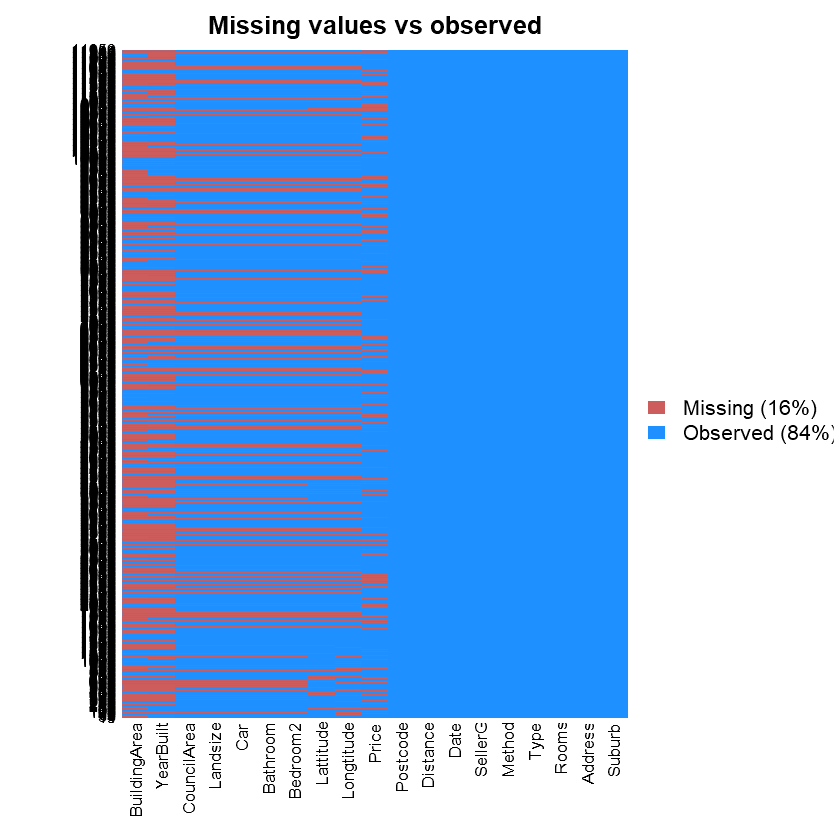


 Variables sorted by number of missings: 
     Variable Count
 BuildingArea  7095
    YearBuilt  6378
  CouncilArea  3039
     Landsize  3037
     Bedroom2  3020
     Bathroom  3020
          Car  3020
    Lattitude  2895
   Longtitude  2880
        Price  2714
       Suburb     0
      Address     0
        Rooms     0
         Type     0
       Method     0
      SellerG     0
         Date     0
     Distance     0
     Postcode     0


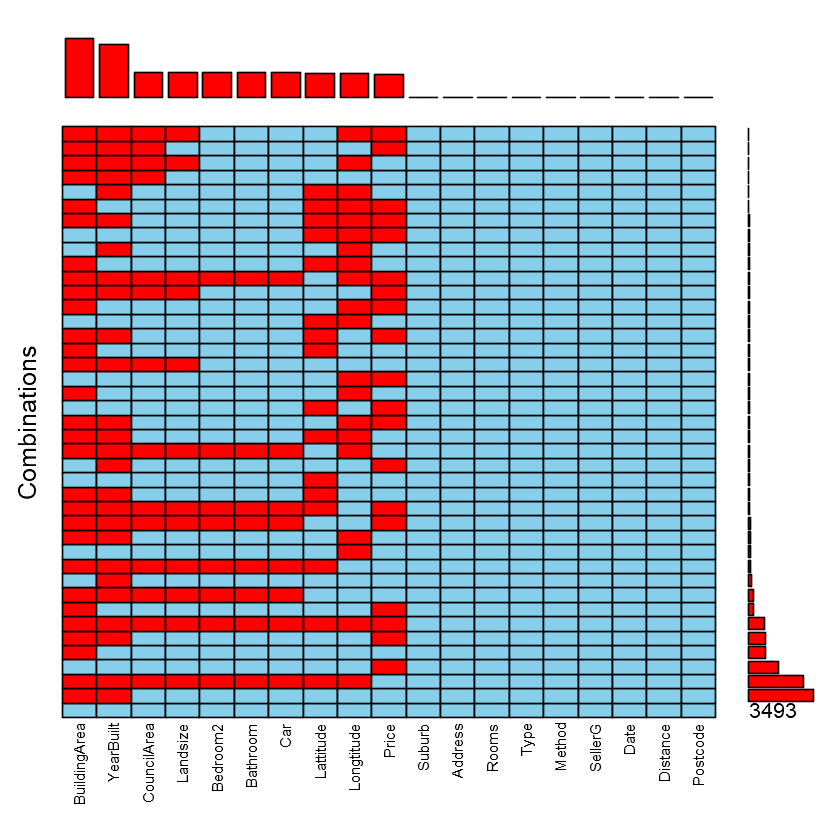

In [41]:
##-----Plotting NAs of the complete File----##
missmap(re.dump, legend = TRUE, col = c("indianred", "dodgerblue"), main = "Missing values vs observed", y.cex = 0.8, x.cex = 0.8, rank.order = TRUE, margins = c(5, 5))

aggr(re.dump, prop = F, combined=T,only.miss = TRUE, cex.axis = 0.7, rank.order = TRUE, sortVars = TRUE)



In [42]:
#Imputing the NAs of Melbourne DataSet#

##---- Imputing Lattitude with reference to Postcode-----##
re.dump$Lattitude<-with(re.dump, ave(Lattitude,Postcode, FUN = function(x) replace(x, is.na(x), median(x, na.rm = T))))
summary(re.dump$Lattitude)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -37.95  -37.85  -37.80  -37.81  -37.76  -37.67       6 

In [43]:
##-----Imputing Longtitude with reference to Postcode-----##
re.dump$Longtitude<-with(re.dump, ave(Longtitude,Postcode, FUN = function(x) replace(x, is.na(x), median(x, na.rm = T)))) #
summary(re.dump$Longtitude)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  144.8   144.9   145.0   145.0   145.1   145.1       6 

In [44]:
##-----Imputing CouncilArea with reference to Postcode-----##
re.dump$CouncilArea<-with(re.dump, ave(CouncilArea, Postcode, FUN = function(x) replace(x, is.na(x), Mode(x, na.rm = T))))
summary(re.dump$CouncilArea)

Banyule       Bayside    Boroondara      Brimbank       Darebin 
          634           625          1581           368          1058 
    Glen Eira   Hobsons Bay          Hume      Kingston    Manningham 
          906           416            35            84           352 
  Maribyrnong     Melbourne        Monash Moonee Valley      Moreland 
          650           261           253          1029          1293 
 Port Phillip   Stonnington    Whitehorse         Yarra          NA's 
          470           816           309           584           235

In [45]:
##=== Filtering on basis of Type for further imputation ===###
re.h<-filter(re.dump, Type %in% c("h"))
re.t<-filter(re.dump, Type %in% c("t"))
re.u<-filter(re.dump, Type %in% c("u"))

In [46]:
##=== Imputing Landsize with reference to Postcode on the different Type(h,u,t) ===##
re.u$Landsize<-with(re.u, ave(Landsize, Postcode, FUN = function(x) replace(x, is.na(x), mean(x, na.rm = TRUE))))
summary(re.u$Landsize)

re.t$Landsize<-with(re.t, ave(Landsize, Postcode, FUN = function(x) replace(x, is.na(x), mean(x, na.rm = TRUE))))
summary(re.t$Landsize)

re.h$Landsize<-with(re.h, ave(Landsize, Postcode, FUN = function(x) replace(x, is.na(x), mean(x, na.rm = TRUE))))
summary(re.h$Landsize)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   70.0   216.1   560.6  1225.1  1639.2 37000.0       9 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   71.0   173.3   255.0   339.4   315.1 15900.0       9 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   70.0   333.0   561.0   540.3   665.4 75100.0 

In [47]:
##=== Imputing Building Area with reference to Postcode on the different Type(h,u,t) ===##
re.u$BuildingArea<-with(re.u, ave(BuildingArea, Postcode, FUN = function(x) replace(x, is.na(x), mean(x, na.rm = TRUE))))
summary(re.u$BuildingArea)

re.t$BuildingArea<-with(re.t, ave(BuildingArea, Postcode, FUN = function(x) replace(x, is.na(x), mean(x, na.rm = TRUE))))
summary(re.t$BuildingArea)

re.h$BuildingArea<-with(re.h, ave(BuildingArea, Postcode, FUN = function(x) replace(x, is.na(x), mean(x, na.rm = TRUE))))
summary(re.h$BuildingArea)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  60.00   81.60   91.00   92.64   98.00  475.00      68 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   60.0   119.5   138.7   150.1   173.3  3558.0      18 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   60.0   137.4   154.0   176.9   202.9  6791.0      12 

In [48]:
##=== Imputing Bedroom with reference to Rooms on the different Type(h,u,t) ===##

re.u$Bedroom2<-with(re.u, ave(Bedroom2, Rooms, FUN = function(x) replace(x, is.na(x), Mode(x, na.rm = T))))
summary(re.u$Bedroom2)

re.t$Bedroom2<-with(re.t, ave(Bedroom2, Rooms, FUN = function(x) replace(x, is.na(x), Mode(x, na.rm = T))))
summary(re.t$Bedroom2)

re.h$Bedroom2<-with(re.h, ave(Bedroom2, Rooms, FUN = function(x) replace(x, is.na(x), Mode(x, na.rm = T))))
summary(re.h$Bedroom2)

0    1    2    3    4    5    6    7    8    9   20   30 NA's 
   0   86 1148  386    9    0    0    0    0    0    0    0  146

0    1    2    3    4    5    6    7    8    9   20   30 NA's 
   1    4  381  745  103    5    0    0    0    0    0    0  143

0    1    2    3    4    5    6    7    8    9   20   30 NA's 
   8   48 1537 4338 2233  561   49   10    7    4    1    1    5

In [49]:
####=== Imputing Bathroom with reference to Rooms on the different Type(h,u,t) ===##

re.u$Bathroom<-with(re.u, ave(Bathroom, Rooms, FUN = function(x) replace(x, is.na(x), Mode(x, na.rm = T))))
summary(re.u$Bathroom)

re.t$Bathroom<-with(re.t, ave(Bathroom, Rooms, FUN = function(x) replace(x, is.na(x), Mode(x, na.rm = T))))
summary(re.t$Bathroom)

re.h$Bathroom<-with(re.h, ave(Bathroom, Rooms, FUN = function(x) replace(x, is.na(x), Mode(x, na.rm = T))))
summary(re.h$Bathroom)

0    1    2    3    4    5    6    7    8   12 NA's 
   2 1266  196    4    0    0    0    0    0    0  307

0    1    2    3    4    5    6    7    8   12 NA's 
   1  212  777   76    5    0    0    0    0    0  311

0    1    2    3    4    5    6    7    8   12 NA's 
  15 4625 3216  809   97   27    4    2    1    1    5

In [50]:
##=== Imputing Car with reference to Postcode on the different Type(h,u,t) ===##

re.h$Car<-with(re.h, ave(Car, Postcode, FUN = function(x) replace(x, is.na(x), Mode(x, na.rm = T))))
summary(re.h$Car)

re.u$Car<-with(re.u, ave(Car, Postcode, FUN = function(x) replace(x, is.na(x), Mode(x, na.rm = T))))
summary(re.u$Car)

re.t$Car<-with(re.t, ave(Car, Postcode, FUN = function(x) replace(x, is.na(x), Mode(x, na.rm = T))))
summary(re.t$Car)

0    1    2    3    4    5    6    7    8   11   26 NA's 
 770 2442 4558  500  357   41   28    6    6    1    1   92

0    1    2    3    4    5    6    7    8   11   26 NA's 
  31  962  223   14    2    0    0    1    0    0    0  542

0    1    2    3    4    5    6    7    8   11   26 NA's 
   8  405  477   14    4    0    0    0    0    0    0  474

In [51]:
##=== Imputing YearBuilt with reference to Postcode on the different Type(h,u,t) ===##
re.h$YearBuilt<-with(re.h, ave(YearBuilt, Postcode, FUN = function(x) replace(x, is.na(x), Mode(x, na.rm = T))))
summary(re.h$YearBuilt)

re.u$YearBuilt<-with(re.u, ave(YearBuilt, Postcode, FUN = function(x) replace(x, is.na(x), Mode(x, na.rm = T))))
summary(re.u$YearBuilt)

re.t$YearBuilt<-with(re.t, ave(YearBuilt, Postcode, FUN = function(x) replace(x, is.na(x), Mode(x, na.rm = T))))
summary(re.t$YearBuilt)

1950    1960    1900    1920    1930    1890    1910    1970    1940    1980 
    485     358     342     282     254     251     251     231     188     105 
   2000    1925    1880    1955    1965    1915    1975    2005    1935    1990 
    101     100      82      71      69      61      53      52      51      48 
   2010    2013    2008    2006    2015    1945    1995    1997    2012    2016 
     48      37      35      33      30      28      28      28      28      28 
   2009    2011    1905    1985    2007    2014    1999    2002    2001    1938 
     26      24      23      23      23      23      22      21      20      19 
   2003    2004    1998    1948    1996    1968    1928    1992    1927    1958 
     19      19      16      14      14      13      11      10       9       9 
   1978    1885    1926    1967    1956    1972    1988    1912    1934    1966 
      9       8       8       8       7       7       7       6       6       6 
   1974    1977    1986    1994    2017    1888    1923    1924    1939    1949 
      6       6       6       6       6       5       5       5       5       5 
   1957    1983    1993    1886    1904    1913    1916    1918    1919    1937 
      5       5       5       4       4       4       4       4       4       4 
   1941    1943    1947    1951    1962    1969    1973    1987    1991    1860 
      4       4       4       4       4       4       4       4       4       3 
   1895    1906    1908    1922    1929    1946    1961    1963 (Other)    NA's 
      3       3       3       3       3       3       3       3      72    4381

1970    1960    1980    1975    2012    2000    2011    1990    2010    1965 
    131      61      36      31      31      23      23      22      20      18 
   2005    2013    1995    2006    2008    2009    1950    1998    2007    1930 
     17      17      15      15      15      14      11      11      11      10 
   1940    1985    1996    1994    2001    2014    1968    2002    2003    1999 
      9       8       8       6       6       6       5       5       5       4 
   1920    1969    1988    1993    2004    1945    1955    1967    1972    1974 
      3       3       3       3       3       2       2       2       2       2 
   1976    1986    1991    1992    1997    1830    1900    1935    1953    1961 
      2       2       2       2       2       1       1       1       1       1 
   1962    1963    1964    1966    1971    1977    1979    1984    1987    1989 
      1       1       1       1       1       1       1       1       1       1 
   2015    1800    1850    1854    1856    1857    1860    1863    1868    1870 
      1       0       0       0       0       0       0       0       0       0 
   1872    1875    1880    1881    1883    1884    1885    1886    1887    1888 
      0       0       0       0       0       0       0       0       0       0 
   1889    1890    1892    1893    1894    1895    1896    1897    1898    1901 
      0       0       0       0       0       0       0       0       0       0 
   1902    1903    1904    1905    1906    1907    1908    1910 (Other)    NA's 
      0       0       0       0       0       0       0       0       0    1130

2000    2012    2010    2013    1990    1970    2009    2005    2007    1995 
     60      43      39      27      24      23      22      21      20      19 
   2011    2008    1980    1998    2006    2014    2001    2015    2003    2016 
     19      15      14      14      14      14      13      13      12      12 
   2004    1960    2002    1997    1999    1996    1940    1975    1950    1985 
     11      10       9       7       7       5       4       4       3       3 
   1993    1994    1890    1920    1930    1955    1976    2017    1880    1887 
      3       3       2       2       2       2       2       2       1       1 
   1915    1925    1945    1965    1967    1973    1978    1987    1988    1992 
      1       1       1       1       1       1       1       1       1       1 
   1800    1830    1850    1854    1856    1857    1860    1863    1868    1870 
      0       0       0       0       0       0       0       0       0       0 
   1872    1875    1881    1883    1884    1885    1886    1888    1889    1892 
      0       0       0       0       0       0       0       0       0       0 
   1893    1894    1895    1896    1897    1898    1900    1901    1902    1903 
      0       0       0       0       0       0       0       0       0       0 
   1904    1905    1906    1907    1908    1910    1911    1912    1913    1914 
      0       0       0       0       0       0       0       0       0       0 
   1916    1917    1918    1919    1921    1922    1923    1924 (Other)    NA's 
      0       0       0       0       0       0       0       0       0     851

In [52]:
##=== Applying Row Bind ===##
re.imputed<-rbind(re.h,re.t,re.u)
dim(re.imputed)

[1] 11959    19

Warning message in if (class(obj) == "amelia") {:
"the condition has length > 1 and only the first element will be used"Warning message:
"Unknown or uninitialised column: 'arguments'."Warning message:
"Unknown or uninitialised column: 'arguments'."Warning message:
"Unknown or uninitialised column: 'imputations'."

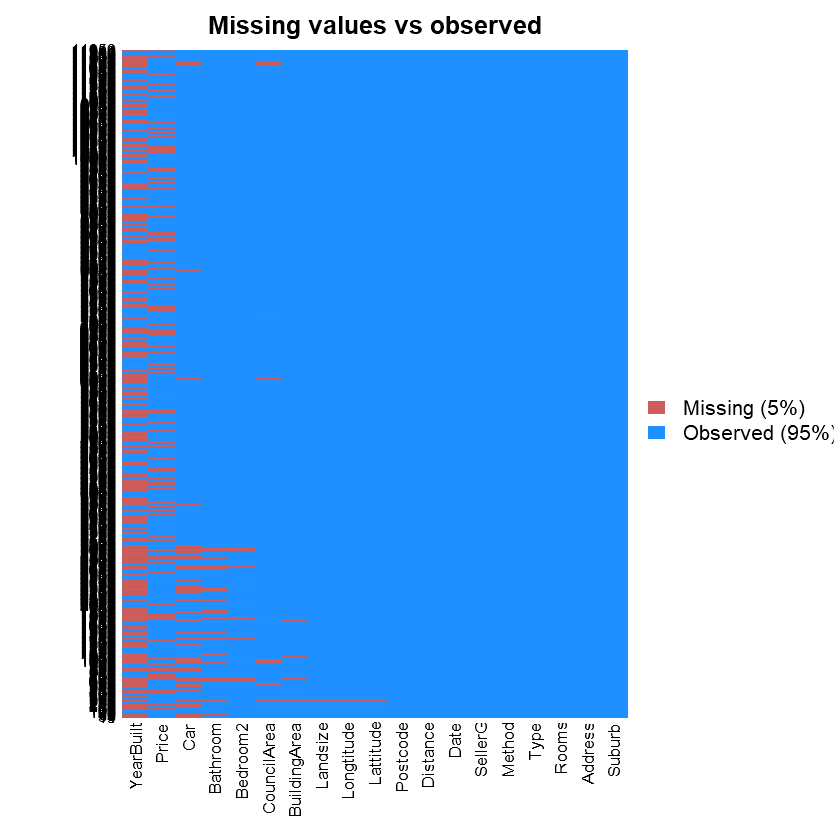


 Variables sorted by number of missings: 
     Variable Count
    YearBuilt  6362
        Price  2714
          Car  1108
     Bathroom   623
     Bedroom2   294
  CouncilArea   235
 BuildingArea    98
     Landsize    18
    Lattitude     6
   Longtitude     6
       Suburb     0
      Address     0
        Rooms     0
         Type     0
       Method     0
      SellerG     0
         Date     0
     Distance     0
     Postcode     0


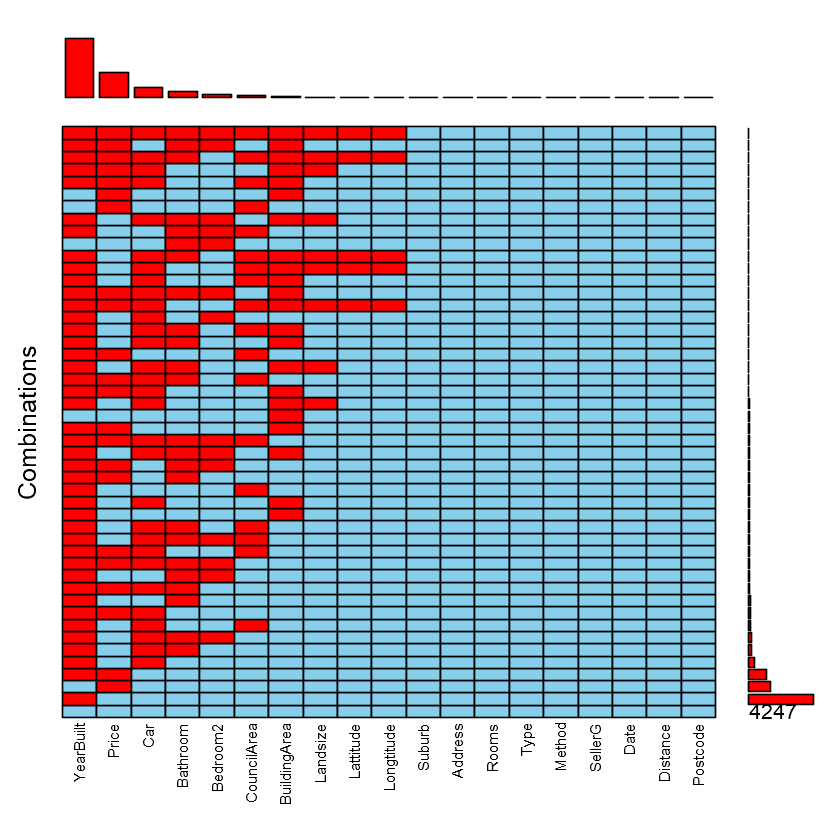

In [53]:
# Checking for NAs on the imputed file(re.imputed) #
missmap(re.imputed, legend = TRUE, col = c("indianred", "dodgerblue"), main = "Missing values vs observed", y.cex = 0.8, x.cex = 0.8, rank.order = TRUE, margins = c(5, 5))

aggr(re.imputed, prop = F, combined=T,only.miss = TRUE, cex.axis = 0.7, rank.order = TRUE, sortVars = TRUE)

#---the file still contains some NAs---#

In [54]:
# Creating a function to remove Nas except Year Col #
completeFun <- function(data, desiredCols) {
  completeVec <- complete.cases(data[, desiredCols])
  return(data[completeVec, ])
}

In [55]:
#-----Removing rest of the NAs from the file except YearBuilt-----#
re.imputed.a<-completeFun(re.imputed,c("Suburb","Address","Rooms","Type","Price","Method","SellerG","Date","Distance","Postcode","Bedroom2","Bathroom","Car","Landsize","BuildingArea","CouncilArea","Lattitude","Longtitude"  ))
dim(re.imputed.a)


[1] 8220   19

In [56]:

re.imputed.noblanks.noyear<-re.imputed.a[,-16] # Removing the Yearbuilt Col


In [58]:
#-----Creating a new file with no YearBuilt Col and no NAs. Saving this file for further use-----#
write.table(re.imputed.noblanks.noyear, file = "F:\\melb.realstate.all.files\\Alloutputfiles\\re.imputed.noblanks.noyear.csv",row.names=FALSE, na="",col.names=T, sep=",")

In [59]:
str(re.imputed.noblanks.noyear)

Classes 'tbl_df', 'tbl' and 'data.frame':	8220 obs. of  18 variables:
 $ Suburb      : Factor w/ 142 levels "Abbotsford","Aberfeldie",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Address     : Factor w/ 11775 levels "1 Abercrombie St",..: 11249 5287 8800 8049 9439 1921 1874 11732 4772 1021 ...
 $ Rooms       : Factor w/ 11 levels "1","2","3","4",..: 2 2 3 3 4 2 3 2 3 2 ...
 $ Type        : Factor w/ 3 levels "h","t","u": 1 1 1 1 1 1 1 1 1 1 ...
 $ Price       : int  1480000 1035000 1465000 850000 1600000 941000 1876000 1636000 1000000 1097000 ...
 $ Method      : Factor w/ 9 levels "PI","PN","S",..: 3 3 6 1 8 3 3 3 3 3 ...
 $ SellerG     : Factor w/ 219 levels "@Realty","Abercromby's",..: 23 23 23 23 142 104 142 142 104 23 ...
 $ Date        : Factor w/ 42 levels "03-09-16","03-12-16",..: 2 3 4 4 5 8 8 11 11 11 ...
 $ Distance    : num  2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 ...
 $ Postcode    : Factor w/ 94 levels "3000","3002",..: 40 40 40 40 40 40 40 40 40 40 ...
 $ Bedroom2    : Factor w/ 12 le

In [60]:
##=== We are not going to impute Price Col as it is one of the dependent variable ===## ##=== Now we going to delete the blank rows ===##
re.imputed.noblanks<-na.omit(re.imputed)
re.imputed.noblanks<-as.tibble(re.imputed.noblanks)
dim(re.imputed.noblanks)

[1] 4247   19

In [61]:
write.table(re.imputed.noblanks, file = "F:\\melb.realstate.all.files\\Alloutputfiles\\re.imputed.noblanks.csv",row.names=FALSE, na="",col.names=T, sep=",")


In [62]:
str(re.imputed.noblanks)

Classes 'tbl_df', 'tbl' and 'data.frame':	4247 obs. of  19 variables:
 $ Suburb      : Factor w/ 142 levels "Abbotsford","Aberfeldie",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Address     : Factor w/ 11775 levels "1 Abercrombie St",..: 5287 8800 9439 1874 11732 1021 8076 2899 8231 10828 ...
 $ Rooms       : Factor w/ 11 levels "1","2","3","4",..: 2 3 4 3 2 2 3 2 3 3 ...
 $ Type        : Factor w/ 3 levels "h","t","u": 1 1 1 1 1 1 1 1 1 1 ...
 $ Price       : int  1035000 1465000 1600000 1876000 1636000 1097000 1350000 1310000 1200000 1176500 ...
 $ Method      : Factor w/ 9 levels "PI","PN","S",..: 3 6 8 3 3 3 8 3 3 3 ...
 $ SellerG     : Factor w/ 219 levels "@Realty","Abercromby's",..: 23 23 142 142 142 23 142 104 104 118 ...
 $ Date        : Factor w/ 42 levels "03-09-16","03-12-16",..: 3 4 5 8 11 11 17 21 23 23 ...
 $ Distance    : num  2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 ...
 $ Postcode    : Factor w/ 94 levels "3000","3002",..: 40 40 40 40 40 40 40 40 40 40 ...
 $ Bedroom2    : Factor w

In [ ]:
library()